In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/cleaned_data_with_stats.csv')
df.head()

,round_winner,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_team_name,player_1_name,player_1_rating,player_1_kills_per_round,player_1_headshots,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,5,66.7,30,58.1,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,0,1,1,0,0
1,1,5,66.7,30,58.1,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,1,1,0,0
2,0,5,66.7,30,58.1,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,0,1,0,0
3,1,5,66.7,30,58.1,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,0,1,0,0
4,1,5,66.7,30,58.1,G2 Esports,NiKo,1.18,0.72,51.8,...,0,0,0,0,1,1,1,1,0,0


In [4]:
df = df.drop(columns=[f'player_{i}_{suffix}' for i in range(1, 11) for suffix in ['team_name', 'name']])
df.head()

,round_winner,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_rating,player_1_kills_per_round,player_1_headshots,player_1_deaths_per_round,player_1_rounds_contributed,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,1,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,0,1,1,0,0
1,1,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,1,1,0,0
2,0,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,0,1,0,0
3,1,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,0,1,0,0
4,1,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,...,0,0,0,0,1,1,1,1,0,0


In [5]:
X = df.drop(['round_winner'], axis=1)
X.head()

,team_1_position,team_1_win_percentage,team_2_position,team_2_win_percentage,player_1_rating,player_1_kills_per_round,player_1_headshots,player_1_deaths_per_round,player_1_rounds_contributed,player_1_team_num,...,player_10_CZ75-Auto,player_10_Desert Eagle,player_10_R8 Revolver,player_10_Dual Berettas,player_10_Smoke Grenade,player_10_High Explosive Grenade,player_10_Flashbang,player_10_Incendiary Grenade,player_10_Molotov,player_10_Decoy Grenade
0,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,0,1,1,0,0
1,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,1,1,0,0
2,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,0,1,0,0
3,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,0,1,0,0
4,5,66.7,30,58.1,1.18,0.72,51.8,0.64,73.5,0,...,0,0,0,0,1,1,1,1,0,0


In [6]:
y = df['round_winner']

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4), 
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

c:\Projects\License\Models\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        67,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,569 (303.00 KB)

 Trainable params: 77,569 (303.00 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [13]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4940 - loss: 3.9177 - val_accuracy: 0.6397 - val_loss: 3.2896
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5449 - loss: 3.1794 - val_accuracy: 0.6956 - val_loss: 2.7648
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6293 - loss: 2.6676 - val_accuracy: 0.7353 - val_loss: 2.3524
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6709 - loss: 2.2706 - val_accuracy: 0.7456 - val_loss: 2.0141
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7295 - loss: 1.9462 - val_accuracy: 0.7647 - val_loss: 1.7457
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7461 - loss: 1.6799 - val_accuracy: 0.7559 - val_loss: 1.5458
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7697 - loss: 1.4700 - val_accuracy: 0.7574 - val_loss: 1.3867
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8071 - loss: 1.2772 - val_accuracy: 0.7515 - v

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.7225 - loss: 0.9020
Test Loss: 0.9044202566146851
Test Accuracy: 0.7215040922164917


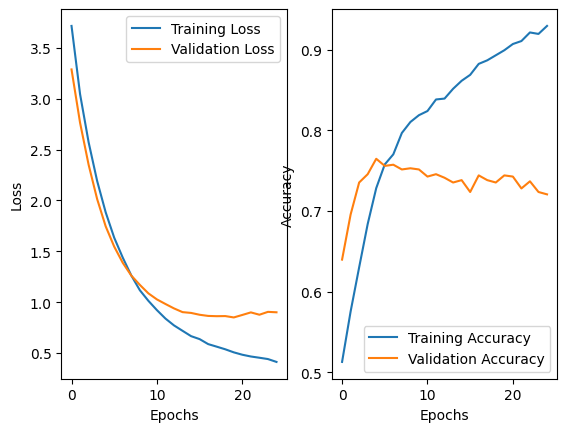

In [15]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()